In [1]:
import json
import sys
import numpy as np
from numpy import log, exp, pi
import pandas as pd
import scipy
import scipy.stats as stats
import random
from scipy.stats import gaussian_kde, loguniform
from math import lgamma
from glob import glob
import os
from ast import literal_eval
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

path = '/Users/chrislam/Desktop/sculpting/'

In [8]:
def better_loglike(lam, k):
	"""
	Calculate Poisson log likelihood
	Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

	Params: 
	- lam: model predictions for transit multiplicity (list of ints)
	- k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

	Returns: Poisson log likelihood (float)
	"""

	logL = []
	#print(lam)
	for i in range(len(lam)):
		if lam[i]==0:
			term3 = -lgamma(k[i]+1)
			term2 = -lam[i]
			term1 = 0
			logL.append(term1+term2+term3)

		else:
			term3 = -lgamma(k[i]+1)
			term2 = -lam[i]
			term1 = k[i]*np.log(lam[i])
			logL.append(term1+term2+term3)

	return np.sum(logL)

berger_kepler = pd.read_csv(path+'berger_kepler_stellar_fgk.csv') # crossmatched with Gaia via Bedell
pnum = pd.read_csv(path+'pnum_plus_cands_fgk.csv')
pnum = pnum.drop_duplicates(['kepid'])
k = pnum.koi_count.value_counts() 
#k = pd.Series([len(berger_kepler)-np.sum(k), 244, 51, 12, 8, 1, 0]) 
k = pd.Series([len(berger_kepler)-np.sum(k), 833, 134, 38, 15, 5])
k = pd.Series([833, 134, 38, 15, 5, 0])
print("k: ", k)

k:  0    833
1    134
2     38
3     15
4      5
5      0
dtype: int64


/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (138) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [221]:
### USE THIS ONE OR THE ONE IN MY PAPER??
pnum_young = pnum.loc[pnum.iso_age <= 1]
pnum_old = pnum.loc[pnum.iso_age > 1]
k_young = pnum_young.koi_count.value_counts() 
k_old = pnum_old.koi_count.value_counts() 
print(k_young)
print(k_old)
print(transit_multiplicity_young)
print(transit_multiplicity_old)


2    4
1    3
Name: koi_count, dtype: int64
1    802
2    155
3     37
4     18
5      6
Name: koi_count, dtype: int64
0    12.8
1     1.0
2     0.4
3     0.2
Name: kepid, dtype: float64
0    764.6
1    100.6
2     20.6
3     15.0
4      5.0
5      1.0
Name: kepid, dtype: float64


In [195]:
df = pd.read_csv('logLs_fgk.csv')
df.transit_multiplicities_all = df.transit_multiplicities_all.apply(literal_eval) # convert back from string to list of floats
df.max_logLs = df.max_logLs.apply(literal_eval) # convert back from string to list of floats
df.min_logLs = df.min_logLs.apply(literal_eval) # convert back from string to list of floats
df.mean_logLs = df.mean_logLs.apply(literal_eval) # convert back from string to list of floats
df.median_logLs = df.median_logLs.apply(literal_eval) # convert back from string to list of floats
df.std_logLs = df.std_logLs.apply(literal_eval) # convert back from string to list of floats

df.max_logLs = df.max_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.min_logLs = df.min_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.mean_logLs = df.mean_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.median_logLs = df.median_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.std_logLs = df.std_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.transit_multiplicities_all = df.transit_multiplicities_all.apply(lambda y: np.nan if len(y)==0 else y)

#print(df.transit_multiplicities_all[0][0])
#print(df)
print(max(df.max_logLs))
print(df.loc[df.max_logLs == max(df.max_logLs)])

# what about the good one?
print(df.loc[(df.ms==-0.2)&(df.bs==0.4)&(df.cs<4e9)&(df.cs>3e9)])

-14767.5083533813
       ms   bs            cs   fs     max_logLs     min_logLs    mean_logLs  \
8513 -0.8  0.4  3.981072e+08  1.0 -14767.508353 -15706.790641 -15175.162288   

      median_logLs   std_logLs               transit_multiplicities_all  
8513  -15051.18787  393.353146  [[4241, 395], [4165, 406], [3990, 371]]  
        ms   bs            cs   fs      max_logLs      min_logLs  \
12551 -0.2  0.4  3.981072e+09  0.0 -175926.108913 -175926.108913   
12552 -0.2  0.4  3.981072e+09  0.1  -57530.353159  -57836.962515   
12553 -0.2  0.4  3.981072e+09  0.2  -44167.097110  -44468.806467   
12554 -0.2  0.4  3.981072e+09  0.3  -36548.564366  -36845.373723   
12555 -0.2  0.4  3.981072e+09  0.4  -31282.041062  -31573.950418   
12556 -0.2  0.4  3.981072e+09  0.5  -27304.287485  -27591.296842   
12557 -0.2  0.4  3.981072e+09  0.6  -24141.708318  -24423.817674   
12558 -0.2  0.4  3.981072e+09  0.7  -21541.673392  -21818.882749   
12559 -0.2  0.4  3.981072e+09  0.8  -19353.385013  -19625.69436

In [196]:
#print(df.transit_multiplicities_all)
logLs = []
mean_logLs = []
for ind, i in enumerate(df.transit_multiplicities_all):
    #print(ind, i)
    f = df.fs[ind]
    #print(f)
    temp_logL = []
    try:
        for j in i:
            try:
                logL = better_loglike(f*np.array(j), list(k))
            except:
                logL = np.nan
            temp_logL.append(logL)
        logLs.append(temp_logL)
        mean_logLs.append(np.mean(temp_logL))
    except:
        logLs.append(np.nan)
        mean_logLs.append(np.nan)
        
print(len(logLs))
df['logLs'] = logLs
df['correct_mean_logLs'] = mean_logLs
print(df)

print(max(df.correct_mean_logLs))
print(df.loc[df.correct_mean_logLs == max(df.correct_mean_logLs)])

14641
        ms   bs            cs   fs      max_logLs      min_logLs  \
0     -2.0  0.0  1.000000e+08  0.0 -175743.107503 -175743.107503   
1     -2.0  0.0  1.000000e+08  0.1  -56937.901260  -57041.807673   
2     -2.0  0.0  1.000000e+08  0.2  -43598.551809  -43700.058221   
3     -2.0  0.0  1.000000e+08  0.3  -35983.212552  -36082.318965   
4     -2.0  0.0  1.000000e+08  0.4  -30711.402357  -30808.108770   
...    ...  ...           ...  ...            ...            ...   
14636  0.0  1.0  1.000000e+10  0.6            NaN            NaN   
14637  0.0  1.0  1.000000e+10  0.7            NaN            NaN   
14638  0.0  1.0  1.000000e+10  0.8            NaN            NaN   
14639  0.0  1.0  1.000000e+10  0.9            NaN            NaN   
14640  0.0  1.0  1.000000e+10  1.0            NaN            NaN   

          mean_logLs   median_logLs     std_logLs  \
0     -175743.107503 -175743.107503  2.910383e-11   
1      -56982.396184  -56967.479619  4.371128e+01   
2      -43642.7800

In [197]:
# redo ms because I forgot that I rounded to single decimal beforehand
ms_corrected = []
ms_corrected_for_plotting = []
for gi_m in range(11):
    for gi_b in range(11):
        ms = -1e-9*np.logspace(8,10,11)[gi_m]
        ms_corrected.append(ms)
        ms_for_plotting = np.log10(np.logspace(8,10,11))[gi_m]
        ms_corrected_for_plotting.append(ms_for_plotting)
print(ms_corrected)
print(ms_corrected_for_plotting)

[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944

In [198]:
df.cs.unique()

array([1.00000000e+08, 1.58489319e+08, 2.51188643e+08, 3.98107171e+08,
       6.30957344e+08, 1.00000000e+09, 1.58489319e+09, 2.51188643e+09,
       3.98107171e+09, 6.30957344e+09, 1.00000000e+10])

In [199]:
df_billion = df.loc[(df.cs > 1e8) & (df.cs < 2e8)]
point_two = df_billion.loc[df.fs == 0.2]
#print(point_two)

df_ten_billion = df.loc[(df.cs >= 1e10)]
point_two = df_ten_billion.loc[df.fs == 0.2]

bs = point_two.bs
logLs = point_two.correct_mean_logLs
print(logLs)
print(bs)
print(point_two.ms)

112     NaN
233     NaN
354     NaN
475     NaN
596     NaN
         ..
14148   NaN
14269   NaN
14390   NaN
14511   NaN
14632   NaN
Name: correct_mean_logLs, Length: 121, dtype: float64
112      0.0
233      0.1
354      0.2
475      0.3
596      0.4
        ... 
14148    0.6
14269    0.7
14390    0.8
14511    0.9
14632    1.0
Name: bs, Length: 121, dtype: float64
112     -2.0
233     -2.0
354     -2.0
475     -2.0
596     -2.0
        ... 
14148    0.0
14269    0.0
14390    0.0
14511    0.0
14632    0.0
Name: ms, Length: 121, dtype: float64


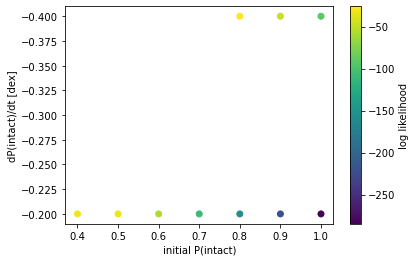

In [200]:
#plt.scatter(bs, [-1*m for m in ms_corrected], c=logLs) # mean_logLs2 for mean instead of peak location of KDE
plt.scatter(bs, point_two.ms, c=logLs)
plt.xlabel('initial P(intact)')
plt.ylabel('dP(intact)/dt [dex]')
#plt.yticks(point_two.ms[::2])
#plt.locator_params(axis='y', nbins=10)
plt.gca().invert_yaxis()
#plt.yscale('symlog')
#plt.yscale('log')
#plt.ylim([1, -2.1])
plt.colorbar(label='log likelihood')
plt.show()

In [201]:
print(-1e-9*np.logspace(8,10,11))
print(df.ms)

[ -0.1         -0.15848932  -0.25118864  -0.39810717  -0.63095734
  -1.          -1.58489319  -2.51188643  -3.98107171  -6.30957344
 -10.        ]
0       -2.0
1       -2.0
2       -2.0
3       -2.0
4       -2.0
        ... 
14636    0.0
14637    0.0
14638    0.0
14639    0.0
14640    0.0
Name: ms, Length: 14641, dtype: float64


### Marginalize over cutoffs and fractions

In [202]:
df.groupby(['ms','bs'], as_index=False).mean('correct_mean_logLs')

,ms,bs,cs,fs,max_logLs,min_logLs,mean_logLs,median_logLs,std_logLs,correct_mean_logLs
0,-2.0,0.0,2.447833e+09,0.5,-42330.860997,-42660.735267,-42525.086954,-42583.664598,142.677588,-1202.969240
1,-2.0,0.1,2.447833e+09,0.5,-42700.052443,-43152.888477,-42866.298970,-42745.955991,203.683542,-1225.885034
2,-2.0,0.2,2.447833e+09,0.5,-42935.161099,-43413.581464,-43173.998381,-43173.252579,196.414631,-1275.835567
3,-2.0,0.3,2.447833e+09,0.5,-43409.505682,-43938.638513,-43656.665541,-43621.852429,224.220875,-1326.460521
4,-2.0,0.4,2.447833e+09,0.5,-43238.524022,-44007.744632,-43565.553310,-43450.391275,337.329564,-1324.263396
...,...,...,...,...,...,...,...,...,...,...
116,0.0,0.6,2.447833e+09,0.5,-46919.897461,-47198.317166,-47055.101857,-47047.090943,114.469300,-1844.530410
117,0.0,0.7,2.447833e+09,0.5,-47895.477342,-48279.558781,-48034.556033,-47928.631976,173.941128,-1999.882759
118,0.0,0.8,2.447833e+09,0.5,-48912.367098,-49810.946883,-49467.391099,-49678.859316,396.238322,-2115.188364
119,0.0,0.9,2.447833e+09,0.5,-50166.168424,-50699.365544,-50438.120904,-50448.828745,217.880690,-2270.456943


      ms   bs            cs   fs     max_logLs     min_logLs    mean_logLs  \
0   -2.0  0.0  2.447833e+09  0.5 -42330.860997 -42660.735267 -42525.086954   
1   -2.0  0.1  2.447833e+09  0.5 -42700.052443 -43152.888477 -42866.298970   
2   -2.0  0.2  2.447833e+09  0.5 -42935.161099 -43413.581464 -43173.998381   
3   -2.0  0.3  2.447833e+09  0.5 -43409.505682 -43938.638513 -43656.665541   
4   -2.0  0.4  2.447833e+09  0.5 -43238.524022 -44007.744632 -43565.553310   
..   ...  ...           ...  ...           ...           ...           ...   
116  0.0  0.6  2.447833e+09  0.5 -46919.897461 -47198.317166 -47055.101857   
117  0.0  0.7  2.447833e+09  0.5 -47895.477342 -48279.558781 -48034.556033   
118  0.0  0.8  2.447833e+09  0.5 -48912.367098 -49810.946883 -49467.391099   
119  0.0  0.9  2.447833e+09  0.5 -50166.168424 -50699.365544 -50438.120904   
120  0.0  1.0  2.447833e+09  0.5 -50990.144131 -51502.004466 -51253.863667   

     median_logLs   std_logLs  correct_mean_logLs  
0   -42583.

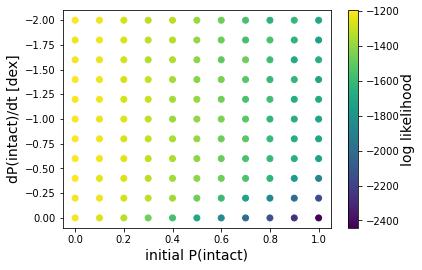

In [206]:
marg = df.groupby(['ms','bs'], as_index=False).mean('correct_mean_logLs')
print(marg)

plt.scatter(marg.bs, marg.ms, c=marg.correct_mean_logLs)
plt.xlabel('initial P(intact)', fontsize=14)
plt.ylabel('dP(intact)/dt [dex]', fontsize=14)
#plt.yticks(point_two.ms[::2])
#plt.locator_params(axis='y', nbins=10)
plt.gca().invert_yaxis()
#plt.yscale('symlog')
#plt.yscale('log')
#plt.ylim([1, -2.1])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='log likelihood',size=14, labelpad=2)
plt.savefig('marginalized_logLs.png', bbox_inches='tight')
plt.show()

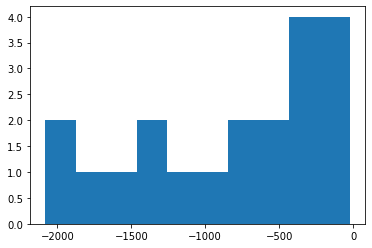

In [52]:
nonzero_df = df.loc[df.fs > 0]
plt.hist(nonzero_df.loc[(nonzero_df.ms==-2.)&(nonzero_df.bs==0.0)].correct_mean_logLs.dropna(), 
         bins=10)
plt.show()

In [160]:
print(bs)
print(df.ms[bs.index].reset_index().ms)

112      0.0
233      0.1
354      0.2
475      0.3
596      0.4
        ... 
14148    0.6
14269    0.7
14390    0.8
14511    0.9
14632    1.0
Name: bs, Length: 121, dtype: float64
0     -2.0
1     -2.0
2     -2.0
3     -2.0
4     -2.0
      ... 
116    0.0
117    0.0
118    0.0
119    0.0
120    0.0
Name: ms, Length: 121, dtype: float64


-4478.378882054117 -20.117394975656527


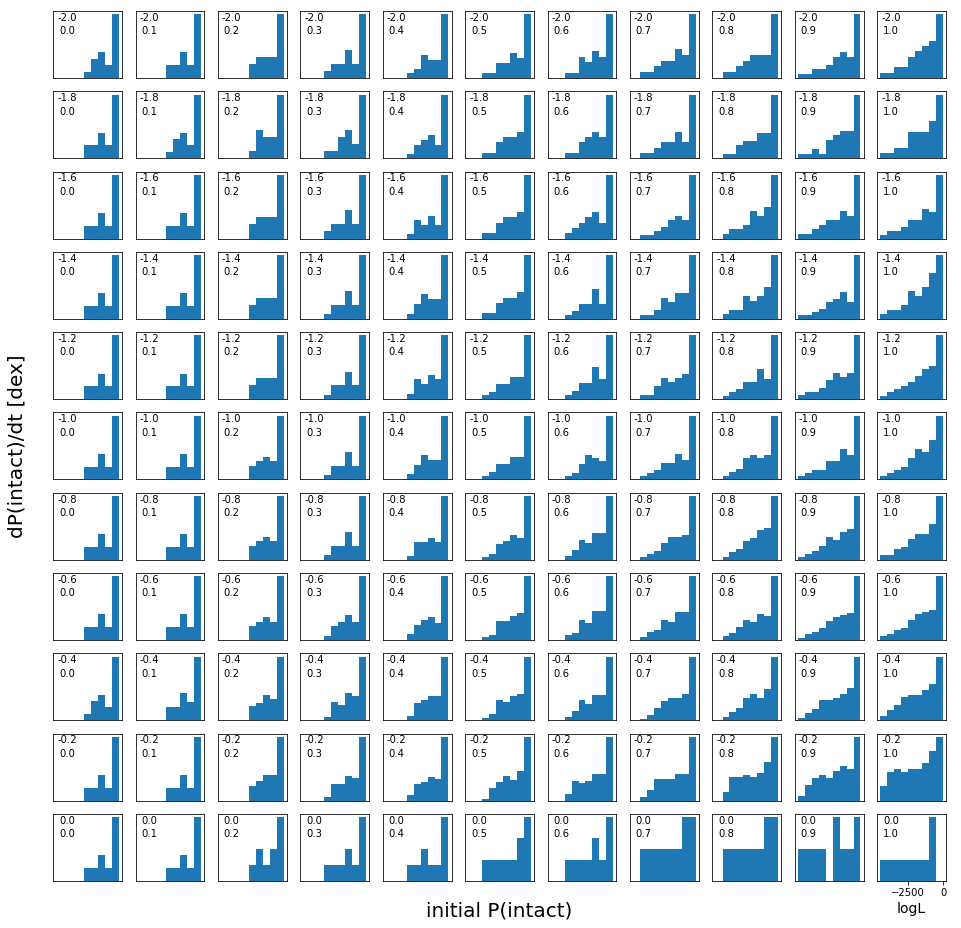

In [66]:
lower = min(nonzero_df.correct_mean_logLs)
upper = max(nonzero_df.correct_mean_logLs)
print(lower, upper)
bins = np.linspace(lower, upper, 10)

fig = plt.figure(figsize=(16,16))
m_index = 0
b_index = 0
for gi_m in range(11):
    for gi_b in range(11):
        ax = plt.subplot2grid((11,11), (gi_m,gi_b))
        m = df.ms[bs.index].reset_index().ms[m_index]
        b = bs.reset_index().bs[b_index]
        ax.text(0.2, 0.9, round(m, 1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.text(0.2, 0.7, round(b,1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.hist(nonzero_df.loc[(nonzero_df.ms==m)&(nonzero_df.bs==b)].correct_mean_logLs.dropna(), 
         bins=bins)
        
        m_index += 1
        b_index += 1
        #ax.set_xlim(lower, upper)
        
        if m_index < 121:
            ax.get_xaxis().set_visible(False)
        else:
            ax.get_xaxis().set_visible(True)  
            ax.set_xlabel('logL', fontsize=14)

        ax.get_yaxis().set_visible(False)

        #index += 1
# add axis labels in the middle of the subplot
fig.add_subplot(111, frameon=False)
# this hack introduces tick marks, so hide them
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('initial P(intact)', fontsize=20)
plt.ylabel('dP(intact)/dt [dex]', fontsize=20)
plt.savefig('posteriors.png')
plt.show()

-4478.378882054117 -20.117394975656527


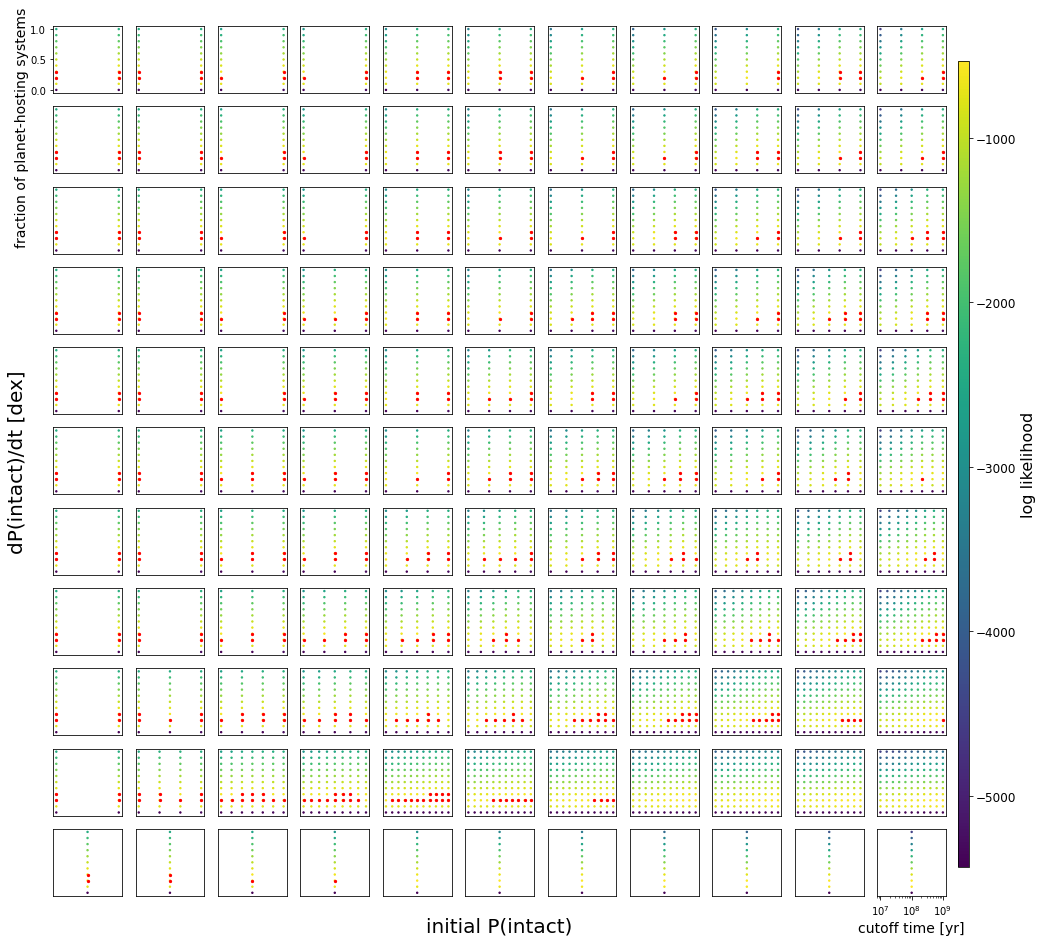

In [207]:
lower = min(nonzero_df.correct_mean_logLs)
upper = max(nonzero_df.correct_mean_logLs)
print(lower, upper)
bins = np.linspace(lower, upper, 10)

fig = plt.figure(figsize=(16,16))
m_index = 0
b_index = 0
for gi_m in range(11):
    for gi_b in range(11):
        ax = plt.subplot2grid((11,11), (gi_m,gi_b))
        m = df.ms[bs.index].reset_index().ms[m_index]
        b = bs.reset_index().bs[b_index]
        #c = df.cs[bs.index].reset_index().cs[m_index]
        #f = df.fs[bs.index].reset_index().fs[m_index]

        #ax.text(0.2, 0.9, round(m, 1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        #ax.text(0.2, 0.7, round(b,1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        
        temp_df = df.loc[(df.ms==m)&(df.bs==b)]
        im = ax.scatter(temp_df.cs, temp_df.fs, s=2, c=temp_df.correct_mean_logLs)
        
        best_df = df.loc[(df.ms==m)&(df.bs==b)&(df.correct_mean_logLs>-100)]
        im_best = ax.scatter(best_df.cs, best_df.fs, s=5, c='r')

        m_index += 1
        b_index += 1
        #ax.set_xlim(lower, upper)
        
        if m_index==121:
            ax.set_xlabel('cutoff time [yr]', fontsize=14)
            ax.get_yaxis().set_visible(False)
        elif m_index==1:
            ax.set_ylabel('fraction of planet-hosting systems', fontsize=14)
            ax.yaxis.set_label_coords(-0.35, -0.5)
            ax.get_xaxis().set_visible(False)
        else:
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)  
            
        ax.set_xscale('log')

        #index += 1
# add axis labels in the middle of the subplot
fig.add_subplot(111, frameon=False)
# this hack introduces tick marks, so hide them
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('initial P(intact)', fontsize=20)
plt.ylabel('dP(intact)/dt [dex]', fontsize=20)

cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = fig.colorbar(im, cbar_ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='log likelihood', size=16)
#fig.tight_layout() # this isn't compatible with the mini-y-axis label positioning
plt.savefig('highlight_best_models.eps', format='eps')
plt.show()

### Intact fractions

In [91]:
np.std(df.correct_mean_logLs)

1530.3953098156203

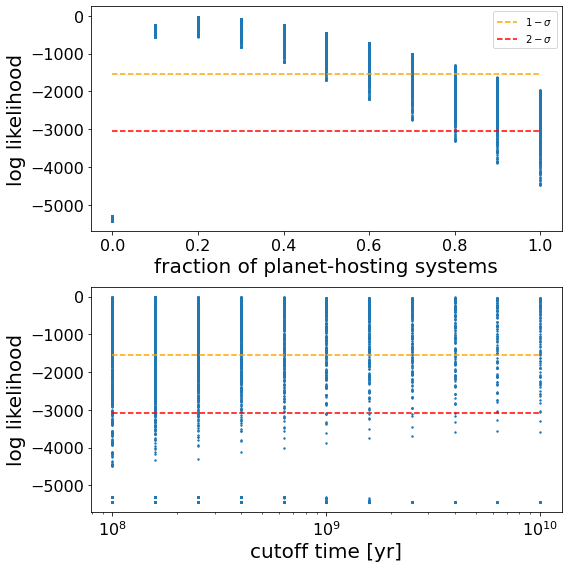

In [208]:
max_logL_overall = max(df.correct_mean_logLs)
fig, axes = plt.subplots(figsize=(8,8))
ax1 = plt.subplot2grid((2,1), (0,0))
ax1.scatter(df.fs, df.correct_mean_logLs, s=2)
ax1.plot([0, 1], [-np.std(df.correct_mean_logLs), -np.std(df.correct_mean_logLs)], 
         linestyle='--', c='orange', label=r'$1-\sigma$')
ax1.plot([0, 1], [-2*np.std(df.correct_mean_logLs), -2*np.std(df.correct_mean_logLs)], 
         linestyle='--', c='r', label=r'$2-\sigma$')
#ax1.set_ylim(-5000, 100)
ax1.set_xlabel('fraction of planet-hosting systems', fontsize=20)
ax1.set_ylabel('log likelihood', fontsize=20)
ax1.tick_params(axis='both', labelsize=16)
ax1.legend()

ax2 = plt.subplot2grid((2,1), (1,0))
ax2.scatter(df.cs, df.correct_mean_logLs, s=2)
ax2.plot([1e8, 1e10], [max_logL_overall-np.std(df.correct_mean_logLs), 
                       max_logL_overall-np.std(df.correct_mean_logLs)], 
         linestyle='--', c='orange', label=r'$1-\sigma$')
ax2.plot([1e8, 1e10], [max_logL_overall-2*np.std(df.correct_mean_logLs), 
                       max_logL_overall-2*np.std(df.correct_mean_logLs)], 
         linestyle='--', c='r', label=r'$2-\sigma$')
#plt.ylim(-4000, 100)
ax2.set_xscale('log')
ax2.set_xlabel('cutoff time [yr]', fontsize=20)
ax2.set_ylabel('log likelihood', fontsize=20)
ax2.tick_params(axis='both', labelsize=16)

fig.tight_layout()
plt.savefig('frac_and_cutoff.png', bbox_inches='tight')
plt.show()

### Young vs old ecc-inc distributions

In [27]:
df = pd.read_csv('transits5_9_5_2.csv')
print(df.head())
print(np.min(df.iso_age))
print(len(df.loc[df.intact_flag=='disrupted']))
print(len(df.loc[df.intact_flag=='intact']))

   Unnamed: 0   kepid           tm_designation  teff  teff_err1  teff_err2  \
0           0  757280  2MASS J19242289+3633538  6543      162.0     -194.0   
1           1  892195  2MASS J19240520+3638374  5522      194.0     -155.0   
2           1  892195  2MASS J19240520+3638374  5522      194.0     -155.0   
3           2  892667  2MASS J19243045+3637186  6609      159.0     -227.0   
4           2  892667  2MASS J19243045+3637186  6609      159.0     -227.0   

    logg  logg_err1  logg_err2  feh_x  ...  intact_flag  num_planets  \
0  4.082      0.258     -0.172  -0.24  ...    disrupted            1   
1  3.984      0.510     -0.170  -0.06  ...    disrupted            2   
2  3.984      0.510     -0.170  -0.06  ...    disrupted            2   
3  4.105      0.246     -0.164  -0.26  ...    disrupted            2   
4  4.105      0.246     -0.164  -0.26  ...    disrupted            2   

        ecc      incl     omega  planet_radius  mutual_incl  transit_status  \
0  0.438226  1.4272

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.7324166657669405
0.2375142104512306


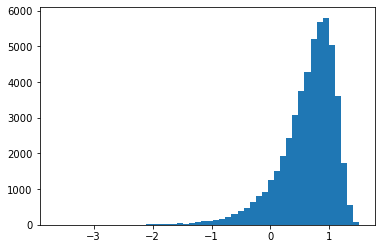

['Unnamed: 0', 'kepid', 'tm_designation', 'teff', 'teff_err1', 'teff_err2', 'logg', 'logg_err1', 'logg_err2', 'feh_x', 'feh_err1', 'feh_err2', 'mass', 'mass_err1', 'mass_err2', 'st_radius', 'radius_err1', 'radius_err2', 'dens', 'dens_err1', 'dens_err2', 'prov_sec', 'kepmag', 'dist', 'dist_err1', 'dist_err2', 'nconfp', 'nkoi', 'ntce', 'datalink_dvr', 'st_delivname', 'st_vet_date_str', 'degree_ra', 'degree_dec', 'st_quarters', 'teff_prov', 'logg_prov', 'feh_prov', 'jmag', 'jmag_err', 'hmag', 'hmag_err', 'kmag_x', 'kmag_err_x', 'dutycycle', 'dataspan', 'mesthres01p5', 'mesthres02p0', 'mesthres02p5', 'mesthres03p0', 'mesthres03p5', 'mesthres04p5', 'mesthres05p0', 'mesthres06p0', 'mesthres07p5', 'mesthres09p0', 'mesthres10p5', 'mesthres12p0', 'mesthres12p5', 'mesthres15p0', 'rrmscdpp01p5', 'rrmscdpp02p0', 'rrmscdpp02p5', 'rrmscdpp03p0', 'rrmscdpp03p5', 'rrmscdpp04p5', 'rrmscdpp05p0', 'rrmscdpp06p0', 'rrmscdpp07p5', 'rrmscdpp09p0', 'rrmscdpp10p5', 'rrmscdpp12p0', 'rrmscdpp12p5', 'rrmscdpp15p

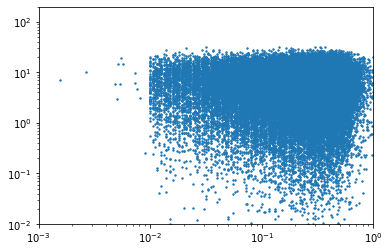

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'yscale', 'xscale'
  cset = contour_func(
/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_4683/1114948090.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-2, 2)


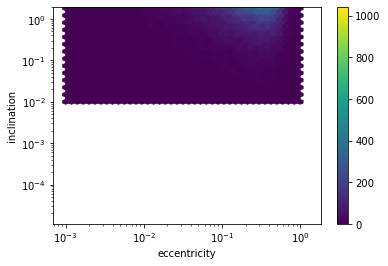

In [23]:
df = pd.read_csv('transits5_9_5_2.csv')
print(np.nanmedian(np.log10(df.mutual_incl*180/np.pi)))
print(np.nanmedian(df.ecc))

plt.hist(np.log10(df.mutual_incl*180/np.pi), bins=50)
plt.show()

#print(df.head())
print(list(df.columns))
plt.scatter(df.ecc, df.mutual_incl*180/np.pi, s=2)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-3,1e0)
plt.ylim(1e-2,2e2)
plt.show()

plt.hexbin(df.ecc, np.abs(df.mutual_incl)*180/np.pi, gridsize=40, yscale='log', xscale='log', extent=(-3, 0, -2, 2))
fig2 = sns.kdeplot(np.array(df.ecc), np.array(np.abs(df.mutual_incl)*180/np.pi), yscale='log', xscale='log', legend = True, 
                   levels=[0.68, 0.95], colors=['black','red'])
plt.ylim(-2, 2)
#plt.xlim(0, 0.5)
plt.xlabel('eccentricity')
plt.ylabel('inclination')
plt.colorbar()
plt.show()

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (0,4,5,6,110,114,115,139,141) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.7327892175530898


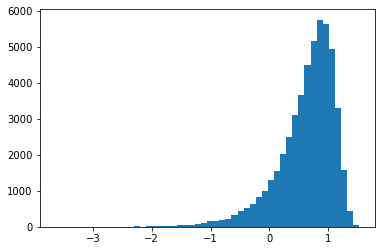

['Unnamed: 0', 'kepid', 'tm_designation', 'teff', 'teff_err1', 'teff_err2', 'logg', 'logg_err1', 'logg_err2', 'feh_x', 'feh_err1', 'feh_err2', 'mass', 'mass_err1', 'mass_err2', 'st_radius', 'radius_err1', 'radius_err2', 'dens', 'dens_err1', 'dens_err2', 'prov_sec', 'kepmag', 'dist', 'dist_err1', 'dist_err2', 'nconfp', 'nkoi', 'ntce', 'datalink_dvr', 'st_delivname', 'st_vet_date_str', 'degree_ra', 'degree_dec', 'st_quarters', 'teff_prov', 'logg_prov', 'feh_prov', 'jmag', 'jmag_err', 'hmag', 'hmag_err', 'kmag_x', 'kmag_err_x', 'dutycycle', 'dataspan', 'mesthres01p5', 'mesthres02p0', 'mesthres02p5', 'mesthres03p0', 'mesthres03p5', 'mesthres04p5', 'mesthres05p0', 'mesthres06p0', 'mesthres07p5', 'mesthres09p0', 'mesthres10p5', 'mesthres12p0', 'mesthres12p5', 'mesthres15p0', 'rrmscdpp01p5', 'rrmscdpp02p0', 'rrmscdpp02p5', 'rrmscdpp03p0', 'rrmscdpp03p5', 'rrmscdpp04p5', 'rrmscdpp05p0', 'rrmscdpp06p0', 'rrmscdpp07p5', 'rrmscdpp09p0', 'rrmscdpp10p5', 'rrmscdpp12p0', 'rrmscdpp12p5', 'rrmscdpp15p

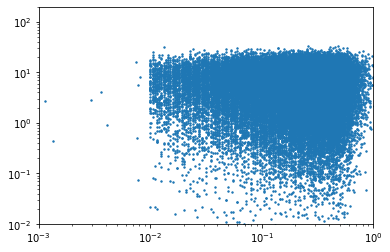

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'yscale', 'xscale'
  cset = contour_func(
/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_4683/1824060561.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-2, 2)


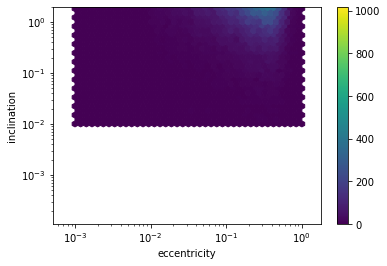

In [20]:
df = pd.read_csv('transits0_0_0_0.csv')
#print(df.head())

print(np.nanmedian(np.log10(df.mutual_incl*180/np.pi)))

plt.hist(np.log10(df.mutual_incl*180/np.pi), bins=50)
plt.show()

print(list(df.columns))
plt.scatter(df.ecc, df.mutual_incl*180/np.pi, s=2)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-3,1e0)
plt.ylim(1e-2,2e2)
plt.show()

plt.hexbin(df.ecc, np.abs(df.mutual_incl)*180/np.pi, gridsize=40, yscale='log', xscale='log', extent=(-3, 0, -2, 2))
fig2 = sns.kdeplot(np.array(df.ecc), np.array(np.abs(df.mutual_incl)*180/np.pi), yscale='log', xscale='log', legend = True, 
                   levels=[0.68, 0.95], colors=['black','red'])
plt.ylim(-2, 2)
#plt.xlim(0, 0.5)
plt.xlabel('eccentricity')
plt.ylabel('inclination')
plt.colorbar()
plt.show()

In [21]:
print(np.nanmedian(df.ecc))

0.2370969629634485


/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


   Unnamed: 0   kepid           tm_designation  teff  teff_err1  teff_err2  \
0           0  757280  2MASS J19242289+3633538  6543      162.0     -194.0   
1           0  757280  2MASS J19242289+3633538  6543      162.0     -194.0   
2           1  892195  2MASS J19240520+3638374  5522      194.0     -155.0   
3           1  892195  2MASS J19240520+3638374  5522      194.0     -155.0   
4           2  892667  2MASS J19243045+3637186  6609      159.0     -227.0   

    logg  logg_err1  logg_err2  feh_x  ...      incl     omega  planet_radius  \
0  4.082      0.258     -0.172  -0.24  ...  1.057226  0.029696            2.0   
1  4.082      0.258     -0.172  -0.24  ...  1.258502  0.518401            2.0   
2  3.984      0.510     -0.170  -0.06  ... -0.961080  1.968308            2.0   
3  3.984      0.510     -0.170  -0.06  ... -0.714896  4.322335            2.0   
4  4.105      0.246     -0.164  -0.26  ... -1.149727  6.071557            2.0   

   planet_mass  mutual_incl     lambda_ks  s

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


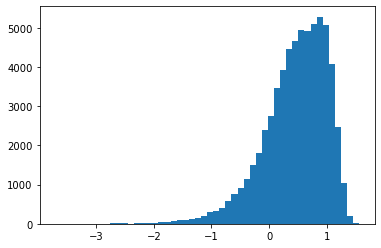

['Unnamed: 0', 'kepid', 'tm_designation', 'teff', 'teff_err1', 'teff_err2', 'logg', 'logg_err1', 'logg_err2', 'feh_x', 'feh_err1', 'feh_err2', 'mass', 'mass_err1', 'mass_err2', 'st_radius', 'radius_err1', 'radius_err2', 'dens', 'dens_err1', 'dens_err2', 'prov_sec', 'kepmag', 'dist', 'dist_err1', 'dist_err2', 'nconfp', 'nkoi', 'ntce', 'datalink_dvr', 'st_delivname', 'st_vet_date_str', 'degree_ra', 'degree_dec', 'st_quarters', 'teff_prov', 'logg_prov', 'feh_prov', 'jmag', 'jmag_err', 'hmag', 'hmag_err', 'kmag_x', 'kmag_err_x', 'dutycycle', 'dataspan', 'mesthres01p5', 'mesthres02p0', 'mesthres02p5', 'mesthres03p0', 'mesthres03p5', 'mesthres04p5', 'mesthres05p0', 'mesthres06p0', 'mesthres07p5', 'mesthres09p0', 'mesthres10p5', 'mesthres12p0', 'mesthres12p5', 'mesthres15p0', 'rrmscdpp01p5', 'rrmscdpp02p0', 'rrmscdpp02p5', 'rrmscdpp03p0', 'rrmscdpp03p5', 'rrmscdpp04p5', 'rrmscdpp05p0', 'rrmscdpp06p0', 'rrmscdpp07p5', 'rrmscdpp09p0', 'rrmscdpp10p5', 'rrmscdpp12p0', 'rrmscdpp12p5', 'rrmscdpp15p

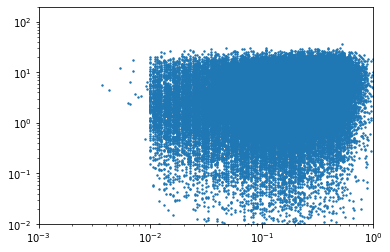

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'yscale', 'xscale'
  cset = contour_func(
/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_16355/1720113572.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-2, 2)


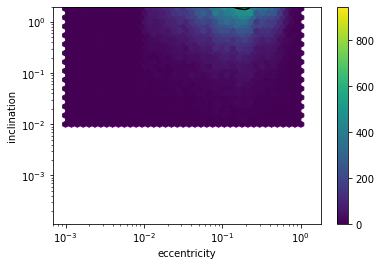

In [210]:
df = pd.read_csv('transits02_04_04_25.csv')
print(df.head())
print(np.min(df.iso_age))
print(len(df.loc[df.intact_flag=='disrupted']))
print(len(df.loc[df.intact_flag=='intact']))

print(np.nanmedian(np.log10(df.mutual_incl*180/np.pi)))
print(np.nanmedian(df.ecc))

plt.hist(np.log10(df.mutual_incl*180/np.pi), bins=50)
plt.show()

print(list(df.columns))
plt.scatter(df.ecc, df.mutual_incl*180/np.pi, s=2)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-3,1e0)
plt.ylim(1e-2,2e2)
plt.show()

plt.hexbin(df.ecc, np.abs(df.mutual_incl)*180/np.pi, gridsize=40, yscale='log', xscale='log', extent=(-3, 0, -2, 2))
fig2 = sns.kdeplot(np.array(df.ecc), np.array(np.abs(df.mutual_incl)*180/np.pi), yscale='log', xscale='log', legend = True, 
                   levels=[0.68, 0.95], colors=['black','red'])
plt.ylim(-2, 2)
#plt.xlim(0, 0.5)
plt.xlabel('eccentricity')
plt.ylabel('inclination')
plt.colorbar()
plt.show()

### Plot model vs data transit multiplicities

In [209]:
young = df.loc[df.iso_age <= 1]
old = df.loc[df.iso_age > 1]
print(len(young), len(old))
print(k[1:])

frac = 0.25
transiters_berger_kepler = df.loc[df['transit_status']==1]
transit_multiplicity = frac*transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
normalize = k[1]/transit_multiplicity[0]
print(transit_multiplicity)

transiters_berger_kepler_young = young.loc[young['transit_status']==1]
transit_multiplicity_young = frac*transiters_berger_kepler_young.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
normalize_young = k[1]/transit_multiplicity_young[0]
print(transit_multiplicity_young)

transiters_berger_kepler_old = old.loc[old['transit_status']==1]
transit_multiplicity_old = frac*transiters_berger_kepler_old.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
normalize_old = k[1]/transit_multiplicity_old[0]
print(transit_multiplicity_old)

plt.scatter(np.arange(6)[1:], k[1:], marker=(5, 1), color='r', s=10)
plt.scatter(np.arange(7)[1:], normalize*transit_multiplicity, s=2)
plt.xlabel('multiplicity')
plt.ylabel('count normalized against Kepler data')
plt.title('all planets')
plt.show()

fig, axes = plt.subplots(figsize=(8,8))
ax1 = plt.subplot2grid((2,1), (0,0))
#plt.figure()
temp_k = [*k,0]
print(temp_k)
ax1.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=10, label=r'$Kepler$')
ax1.scatter(np.arange(7)[1:], normalize_young*transit_multiplicity_young, s=2, label='model')
#ax1.set_xlabel('multiplicity', fontsize=14)
ax1.set_ylabel('count normalized against Kepler data', fontsize=14)
ax1.set_title('young planets', fontsize=18)
ax1.legend(prop={'size': 6})

ax2 = plt.subplot2grid((2,1), (1,0))
ax2.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=10, label=r'$Kepler$')
ax2.scatter(np.arange(7)[1:], normalize_old*transit_multiplicity_old, s=2, label='model')
ax2.set_xlabel('multiplicity', fontsize=14)
ax2.set_ylabel('count normalized against Kepler data', fontsize=14)
ax2.set_title('old planets', fontsize=18)
ax2.legend(prop={'size': 6})

fig.tight_layout()
plt.savefig('young_v_old_best_model.eps', format='eps')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'iso_age'

#### Best model yet

transit multiplicity:  [931.25, 129.0, 29.0, 24.75, 11.75, 2.25]

k:  [833, 134, 38, 15, 5, 0]

logL:  -28.11717015937918

old logL:  -166.8393399861186

total:  126860

transiters:  5790


#### Best model (now excluding the zero bin)

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


        Unnamed: 0     kepid           tm_designation  teff  teff_err1  \
0                0    757280  2MASS J19242289+3633538  6543      162.0   
1                0    757280  2MASS J19242289+3633538  6543      162.0   
2                1    892195  2MASS J19240520+3638374  5522      194.0   
3                1    892195  2MASS J19240520+3638374  5522      194.0   
4                2    892667  2MASS J19243045+3637186  6609      159.0   
...            ...       ...                      ...   ...        ...   
122098       67377  12984000  2MASS J19194837+5225067  5835      174.0   
122099       67377  12984000  2MASS J19194837+5225067  5835      174.0   
122100       67377  12984000  2MASS J19194837+5225067  5835      174.0   
122101       67378  12984200  2MASS J19201625+5224552  5862      161.0   
122102       67379  12984307  2MASS J19202959+5228286  5802      205.0   

        teff_err2   logg  logg_err1  logg_err2  feh_x  ...  intact_flag  \
0          -194.0  4.082      0.258 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


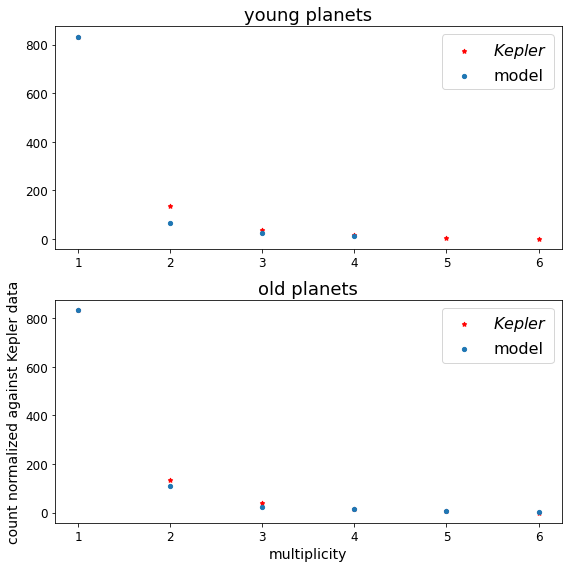

-28.114427441073918
-3379.453851950357
-29.26424847877579
0.2379712210183206


In [217]:
df = pd.read_csv('transits6_4_2_0.csv')
print(df)
young = df.loc[df.iso_age <= 1]
old = df.loc[df.iso_age > 1]
print(len(young), len(old))
print(k[1:])

frac = 0.2
transiters_berger_kepler = df.loc[df['transit_status']==1]
transit_multiplicity = frac*transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
normalize = k[0]/transit_multiplicity[0]
print(transit_multiplicity)

transiters_berger_kepler_young = young.loc[young['transit_status']==1]
transit_multiplicity_young = frac*transiters_berger_kepler_young.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
normalize_young = k[0]/transit_multiplicity_young[0]
print(transit_multiplicity_young)

transiters_berger_kepler_old = old.loc[old['transit_status']==1]
transit_multiplicity_old = frac*transiters_berger_kepler_old.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
normalize_old = k[0]/transit_multiplicity_old[0]
print(transit_multiplicity_old)

"""
plt.scatter(np.arange(6)[1:], k[1:], marker=(5, 1), color='r', s=10)
plt.scatter(np.arange(7)[1:], normalize*transit_multiplicity, s=2)
plt.xlabel('multiplicity')
plt.ylabel('count normalized against Kepler data')
plt.title('all planets')
plt.show()
"""

fig, axes = plt.subplots(figsize=(8,8))
ax1 = plt.subplot2grid((2,1), (0,0))
#plt.figure()
#temp_k = [*k,0]
ax1.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=20, label=r'$Kepler$')
ax1.scatter(np.arange(5)[1:], normalize_young*transit_multiplicity_young, s=18, label='model')
#ax1.set_xlabel('multiplicity')
#ax1.set_ylabel('count normalized against Kepler data', fontsize=14)
ax1.set_title('young planets', fontsize=18)
ax1.tick_params(axis='both', labelsize=12)
ax1.legend(prop={'size': 16})

ax2 = plt.subplot2grid((2,1), (1,0))
ax2.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=20, label=r'$Kepler$')
ax2.scatter(np.arange(7)[1:], normalize_old*transit_multiplicity_old, s=18, label='model')
ax2.set_xlabel('multiplicity', fontsize=14)
ax2.set_ylabel('count normalized against Kepler data', fontsize=14)
ax2.set_title('old planets', fontsize=18)
ax2.tick_params(axis='both', labelsize=12)
ax2.legend(prop={'size': 16})

fig.tight_layout()
plt.savefig('young_v_old_best_model.eps', format='eps')
plt.show()

print(better_loglike(list(transit_multiplicity), list(k)))
print(better_loglike(list(transit_multiplicity_young), list(k)))
print(better_loglike(list(transit_multiplicity_old), list(k)))
print(len(df.loc[df.intact_flag=='intact'])/len(df))

In [ ]:
df = pd.read_csv('transits6_4_2_0.csv')
print(df)
young = df.loc[df.iso_age <= 1]
old = df.loc[df.iso_age > 1]
print(len(young), len(old))
print(k[1:])

frac = 0.2
transiters_berger_kepler = df.loc[df['transit_status']==1]
transit_multiplicity = frac*transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
normalize = k[0]/transit_multiplicity[0]
print(transit_multiplicity)

transiters_berger_kepler_young = young.loc[young['transit_status']==1]
transit_multiplicity_young = frac*transiters_berger_kepler_young.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
normalize_young = k[0]/transit_multiplicity_young[0]
print(transit_multiplicity_young)

transiters_berger_kepler_old = old.loc[old['transit_status']==1]
transit_multiplicity_old = frac*transiters_berger_kepler_old.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid
normalize_old = k[0]/transit_multiplicity_old[0]
print(transit_multiplicity_old)

"""
plt.scatter(np.arange(6)[1:], k[1:], marker=(5, 1), color='r', s=10)
plt.scatter(np.arange(7)[1:], normalize*transit_multiplicity, s=2)
plt.xlabel('multiplicity')
plt.ylabel('count normalized against Kepler data')
plt.title('all planets')
plt.show()
"""

fig, axes = plt.subplots(figsize=(8,8))
ax1 = plt.subplot2grid((2,1), (0,0))
#plt.figure()
#temp_k = [*k,0]
ax1.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=20, label=r'$Kepler$')
ax1.scatter(np.arange(5)[1:], normalize_young*transit_multiplicity_young, s=18, label='model')
#ax1.set_xlabel('multiplicity')
#ax1.set_ylabel('count normalized against Kepler data', fontsize=14)
ax1.set_title('young planets', fontsize=18)
ax1.tick_params(axis='both', labelsize=12)
ax1.legend(prop={'size': 16})

ax2 = plt.subplot2grid((2,1), (1,0))
ax2.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=20, label=r'$Kepler$')
ax2.scatter(np.arange(7)[1:], normalize_old*transit_multiplicity_old, s=18, label='model')
ax2.set_xlabel('multiplicity', fontsize=14)
ax2.set_ylabel('count normalized against Kepler data', fontsize=14)
ax2.set_title('old planets', fontsize=18)
ax2.tick_params(axis='both', labelsize=12)
ax2.legend(prop={'size': 16})

fig.tight_layout()
plt.savefig('young_v_old_best_model.eps', format='eps')
plt.show()

print(better_loglike(list(transit_multiplicity), list(k)))
print(better_loglike(list(transit_multiplicity_young), list(k)))
print(better_loglike(list(transit_multiplicity_old), list(k)))
print(len(df.loc[df.intact_flag=='intact'])/len(df))

### AMD plot

One AMD value per system, so I'll plot the system's AMD at (mean(ecc), mean(incl)).

In [77]:
G = 6.6743e-8 # gravitational constant in cgs
calculate_amd([earth_mass_to_cgs(5.), earth_mass_to_cgs(5.)],
              [solar_mass_to_cgs(1.), solar_mass_to_cgs(1.)],
              [au_to_cgs(1.), au_to_cgs(2.)],
              [0.01, 0.01], [2*180/np.pi, 2*180/np.pi], 2)

TypeError: can't multiply sequence by non-int of type 'float'

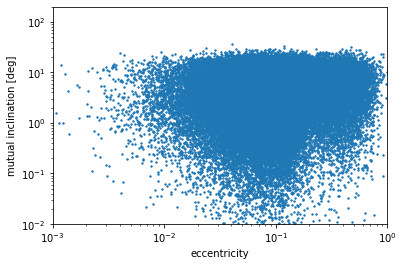

In [68]:
def calculate_amd(m_pks, m_star, a_ks, e_ks, i_ks, multiplicity):
    ### 
    # calculate angular momentum deficit following Eqn 13 from Milholland et al 2021
    ###
    amd = []
    for i in range(multiplicity):
        lambda_k = m_pks[i] * np.sqrt(G*m_star*a_ks[i])
        second_term = 1 - (np.sqrt(1 - (e_ks[i])**2))*np.cos(i_ks[i])
        amd.append(lambda_k * second_term)
        
    return np.sum(amd)

def earth_mass_to_cgs(mass):
    return mass*5.974e27 # grams

def solar_mass_to_cgs(mass):
    return mass*1.989e33 # grams

def au_to_cgs(distance):
    return distance*1.496e13 # cm

m_planet = 5. # 5 Earth masses roughly corresponds to 2 Earth radii, per Chen & Kipping

"""
# calculate AMD per system
amd = calculate_amd(earth_mass_to_cgs(m_planet), solar_mass_to_cgs(m_star), 
    [au_to_cgs(pac2_elt) for pac2_elt in planets_a_case2], eccentricity, 
    inclinations, num_planets)
amds.append(amd)
"""

plt.scatter(df.ecc, df.mutual_incl*180/np.pi, s=2)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-3,1e0)
plt.ylim(1e-2,2e2)
plt.xlabel('eccentricity')
plt.ylabel('mutual inclination [deg]')
plt.show()

In [75]:
def p_to_a(P, star_mass):
    """
    Newton's full version of Kepler's Third Law, assuming planet mass m --> 0
    Params: 
    - P: days
    - star_mass: Solar masses
    """

    P = P*86400 # days to seconds
    star_mass = star_mass*1.989e30 # solar mass to kg
    a_in_meters = (((P**2) * 6.67e-11 * star_mass)/(4*np.pi**2))**(1./3) # SI units(!)
    a = a_in_meters/(1.496e11) # meters to AU
    return a # in AU

def calculate_amd_array(df, m_pks, m_star, a_ks, e_ks, i_ks, multiplicity):
    ### 
    # calculate angular momentum deficit following Eqn 13 from Milholland et al 2021
    ###
    
    G = 6.6743e-8 # gravitational constant in cgs

    amds = []
    sys_ids = df.kepid.unique()
    for sys_id in sys_ids:
        # for each system
        system = df.loc[df.kepid == sys_id]
        print(system)

        # get mean ecc and incl
        #mean_ecc = np.mean(system.ecc)
        #mean_incl = np.mean(system.incl)
        
        # get system-level variables to constant form
        #sys_mass = df
        
        lambda_ks = m_pks * np.sqrt(G*m_star*a_ks)
        second_terms = 1 - (np.sqrt(1 - (e_ks)**2))*np.cos(i_ks)
        print(lambda_ks)
        print(second_terms)

        amd.append(lambda_k * second_term)
        
    return np.sum(amd)

m_planet = earth_mass_to_cgs(5.)
a_s = p_to_a(df.P, df.iso_mass)
amds = calculate_amd_array(df, m_planet, df.iso_mass, a_s, df.ecc, df.incl, df.num_planets)
print(amds)

   Unnamed: 0   kepid           tm_designation  teff  teff_err1  teff_err2  \
0           0  757280  2MASS J19242289+3633538  6543      162.0     -194.0   
1           0  757280  2MASS J19242289+3633538  6543      162.0     -194.0   

    logg  logg_err1  logg_err2  feh_x  ...  intact_flag  num_planets  \
0  4.082      0.258     -0.172  -0.24  ...    disrupted            2   
1  4.082      0.258     -0.172  -0.24  ...    disrupted            2   

        ecc      incl     omega  planet_radius  mutual_incl  transit_status  \
0  0.086055  0.496742  1.135532            2.0    -0.092121               0   
1  0.089793  0.054348  5.501752            2.0     0.350272               0   

   prob_detections   sn  
0              0.0  0.0  
1              0.0  0.0  

[2 rows x 156 columns]
0         3.749743e+24
1         5.722424e+24
2         2.409837e+24
3         2.793267e+24
4         2.530315e+24
              ...     
126855    7.772043e+24
126856    3.872476e+24
126857    1.659385e+24
1

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


NameError: name 'adfadf' is not defined

In [60]:
df.groupby('kepid').mean('ecc')

,Unnamed: 0,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh_x,feh_err1,feh_err2,...,P,num_planets,ecc,incl,omega,planet_radius,mutual_incl,transit_status,prob_detections,sn
kepid,,,,,,,,,,,,,,,,,,,,,
757280,0.0,6543.0,162.0,-194.0,4.082,0.258,-0.172,-0.24,0.25,-0.30,...,32.450581,2.0,0.087924,0.275545,3.318642,2.0,0.129076,0.0,0.0,0.0
892195,1.0,5522.0,194.0,-155.0,3.984,0.510,-0.170,-0.06,0.30,-0.25,...,14.973301,1.0,0.371028,-0.255088,3.989879,2.0,-0.208703,0.0,0.0,0.0
892667,2.0,6609.0,159.0,-227.0,4.105,0.246,-0.164,-0.26,0.25,-0.30,...,6.302544,2.0,0.094607,0.191399,2.988736,2.0,0.080496,0.0,0.0,0.0
892678,3.0,6137.0,167.0,-186.0,3.936,0.428,-0.143,-0.26,0.30,-0.30,...,36.758715,6.0,0.079463,0.443326,2.660679,2.0,0.048821,0.0,0.0,0.0
892713,4.0,6106.0,186.0,-186.0,3.854,0.496,-0.124,-0.24,0.30,-0.30,...,132.649398,2.0,0.068143,-0.309143,2.456354,2.0,0.336475,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12935035,67375.0,6071.0,192.0,-234.0,3.992,0.382,-0.127,-0.06,0.25,-0.30,...,54.106747,1.0,0.198305,-0.117075,3.838655,2.0,0.176388,0.0,0.0,0.0
12983952,67376.0,5365.0,175.0,-191.0,4.571,0.032,-0.136,0.12,0.25,-0.30,...,69.485208,2.0,0.065440,-0.327143,2.007197,2.0,-0.042995,0.0,0.0,0.0
12984000,67377.0,5835.0,174.0,-192.0,4.464,0.084,-0.196,-0.26,0.30,-0.30,...,63.988243,5.0,0.066461,-0.970327,4.147500,2.0,-0.010258,0.0,0.0,0.0


In [62]:
df.loc[df.kepid==757280]

,Unnamed: 0,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh_x,...,intact_flag,num_planets,ecc,incl,omega,planet_radius,mutual_incl,transit_status,prob_detections,sn
0,0,757280,2MASS J19242289+3633538,6543,162.0,-194.0,4.082,0.258,-0.172,-0.24,...,disrupted,2,0.086055,0.496742,1.135532,2.0,-0.092121,0,0.0,0.0
1,0,757280,2MASS J19242289+3633538,6543,162.0,-194.0,4.082,0.258,-0.172,-0.24,...,disrupted,2,0.089793,0.054348,5.501752,2.0,0.350272,0,0.0,0.0
